# Tutorial for calculating Partisan Dislocation

In [1]:
import partisan_dislocation as pdn
import geopandas as gpd

In [2]:
us = gpd.read_file('2008_presidential_precinct_data/2008_presidential_precinct_counts.shp')

In [3]:
us.head()

,P2008_D,P2008_R,STATE,COUNTY,NAME,geometry
0,1891.0,768.0,48,453,Travis,"POLYGON ((1717728.210 7368333.015, 1717777.958..."
1,1101.0,798.0,48,201,Harris,"POLYGON ((1912654.744 7312563.597, 1912663.706..."
2,924.0,497.0,48,453,Travis,"POLYGON ((1714250.972 7355096.188, 1714202.932..."
3,1.0,0.0,48,029,Bexar,"POLYGON ((1669729.218 7263595.876, 1669410.636..."
4,780.0,585.0,48,029,Bexar,"POLYGON ((1629491.358 7265195.230, 1629492.219..."


In [4]:
# Subset to North Carolina
nc = us[us.STATE == "37"]

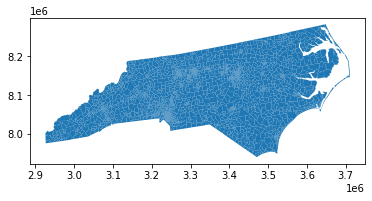

In [5]:
nc.plot()

In [6]:
voters = pdn.random_points_in_polygon(nc, p=0.001, 
                                      dem_vote_count_column="P2008_D", 
                                      repub_vote_count_column="P2008_R")

In [7]:
voters.head()

,Dem,KnnShrDem,geometry
0,0,NaN,POINT (3432632.587 8012146.898)
1,0,NaN,POINT (3438731.060 8014742.809)
2,0,NaN,POINT (3447604.666 8008549.402)
3,0,NaN,POINT (3473728.383 8000734.437)
4,0,NaN,POINT (3461918.448 8008459.483)


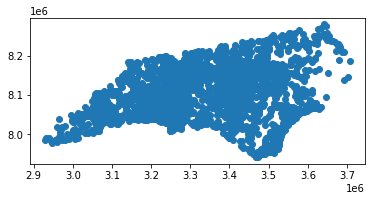

In [8]:
voters.plot()

In [5]:
from shapely.geometry import Polygon
df = gpd.GeoDataFrame({'dem': [0, 1], 'repub': [1, 0],
                   'geometry': [Polygon([(-1.3, -1.0), (2.8, -3.1), (4.4, 7.9)]),
                                Polygon([(8.6, 10.5), (-5.3, -3.4), (6.2, 9.1)])]})
result = pdn.random_points_in_polygon(df, p=1,
                              dem_vote_count='dem',
                              repub_vote_count='repub')


In [6]:
result

,Dem,KnnShrDem,geometry
0,0,NaN,POINT (-0.76401 -1.16131)
1,0,NaN,POINT (4.88185 7.37004)


In [ ]:
    gf = gpd.GeoDataFrame(columns=['Dem', 'KnnShrDem', 'geometry'])

    for index, row in precincts.iterrows():
        # Loop over dems and republicans
        for party in [dem_vote_count, repub_vote_count]:
            points_to_add = np.random.binomial(int(row[party]), p)
            points = _make_random_points(points_to_add, row.geometry)
            for point in points:
                if party == "D":
                    dem_value = 1
                else:
                    dem_value = 0

                gf = gf.append({'Dem': dem_value, 'KnnShrDem': None, 'geometry': point}, ignore_index=True)

    gf['Dem'] = gf['Dem'].astype('int64')
    gf['KnnShrDem'] = gf['KnnShrDem'].astype(None)

